<h1>Empleamos el ONI</h1>

In [1]:
#import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
#from tools import search_oni
import skimage
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
ds_currents_anomaly = xr.open_dataset(r'E:\Proyecto de Grado\Data\Nueva carpeta\corrientes_u_v_5m_anomaly.nc')
ds_currents_anomaly

<xarray.Dataset>
Dimensions:  (lon: 372, lat: 205, anomaly: 3)
Coordinates:
  * lon      (lon) float32 -89.92 -89.83 -89.75 -89.67 ... -59.17 -59.08 -59.0
  * lat      (lat) float32 7.0 7.083 7.167 7.25 7.333 ... 23.75 23.83 23.92 24.0
  * anomaly  (anomaly) object 'Neutro' 'Niña' 'Niño'
Data variables:
    vo       (anomaly, lat, lon) float32 ...
    uo       (anomaly, lat, lon) float32 ...

In [6]:
ds_neutro_anomaly = ds_currents_anomaly.where(ds_currents_anomaly['anomaly'] == 'Neutro')
ds_neutro_anomaly


<xarray.Dataset>
Dimensions:  (anomaly: 3, lat: 205, lon: 372)
Coordinates:
  * lon      (lon) float32 -89.92 -89.83 -89.75 -89.67 ... -59.17 -59.08 -59.0
  * lat      (lat) float32 7.0 7.083 7.167 7.25 7.333 ... 23.75 23.83 23.92 24.0
  * anomaly  (anomaly) object 'Neutro' 'Niña' 'Niño'
Data variables:
    vo       (anomaly, lat, lon) float32 -0.02246 -0.0229 -0.02309 ... nan nan
    uo       (anomaly, lat, lon) float32 0.3061 0.3072 0.3083 ... nan nan nan

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


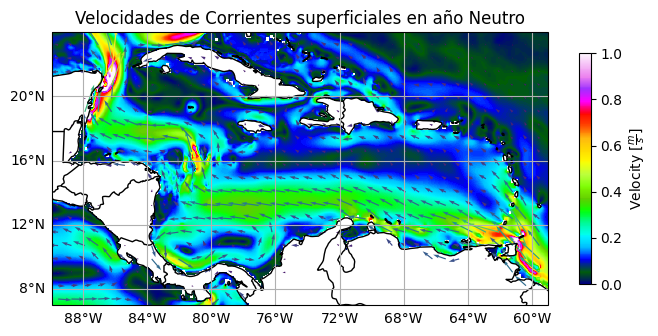

In [7]:
lat = ds_neutro_anomaly['lat'].to_numpy()
lon = ds_neutro_anomaly['lon'].to_numpy()
V = ds_neutro_anomaly["vo"].mean(dim=["anomaly"]).to_numpy()
U = ds_neutro_anomaly["uo"].mean(dim=["anomaly"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)

# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocity [$\frac{m}{s}$]", shrink = 0.5)

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Velocidades de Corrientes superficiales en año Neutro")
plt.show()

In [9]:
ds_niño_anomaly = ds_currents_anomaly.where(ds_currents_anomaly['anomaly'] == 'Niño')

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


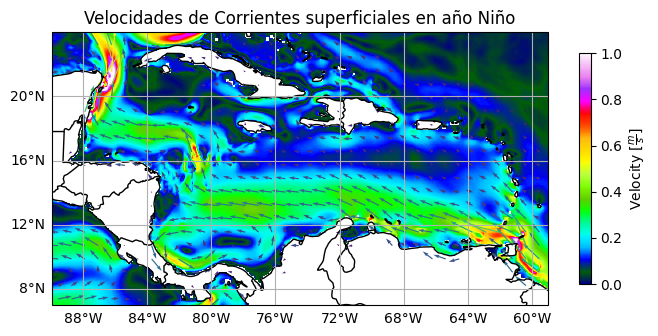

In [10]:
lat = ds_niño_anomaly['lat'].to_numpy()
lon = ds_niño_anomaly['lon'].to_numpy()
V = ds_niño_anomaly["vo"].mean(dim=["anomaly"]).to_numpy()
U = ds_niño_anomaly["uo"].mean(dim=["anomaly"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)

# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocity [$\frac{m}{s}$]", shrink = 0.5)

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Velocidades de Corrientes superficiales en año Niño")
plt.show()

In [13]:
ds_niña_anomaly = ds_currents_anomaly.where(ds_currents_anomaly['anomaly'] == 'Niña')
ds_niña_anomaly

<xarray.Dataset>
Dimensions:  (anomaly: 3, lat: 205, lon: 372)
Coordinates:
  * lon      (lon) float32 -89.92 -89.83 -89.75 -89.67 ... -59.17 -59.08 -59.0
  * lat      (lat) float32 7.0 7.083 7.167 7.25 7.333 ... 23.75 23.83 23.92 24.0
  * anomaly  (anomaly) object 'Neutro' 'Niña' 'Niño'
Data variables:
    vo       (anomaly, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    uo       (anomaly, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


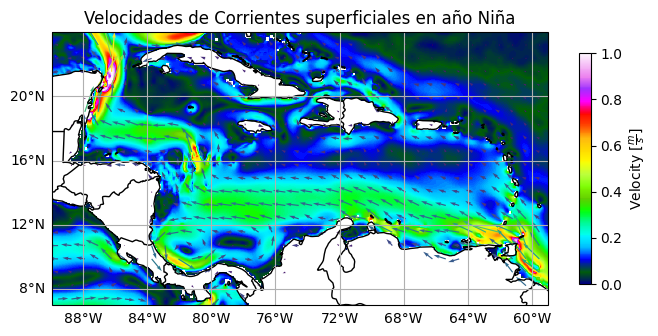

In [12]:
lat = ds_niña_anomaly['lat'].to_numpy()
lon = ds_niña_anomaly['lon'].to_numpy()
V = ds_niña_anomaly["vo"].mean(dim=["anomaly"]).to_numpy()
U =     ds_niña_anomaly["uo"].mean(dim=["anomaly"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)

# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocity [$\frac{m}{s}$]", shrink = 0.5)

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Velocidades de Corrientes superficiales en año Niña")
plt.show()